<a href="https://colab.research.google.com/github/as-bestinclass/anand4MahiGaming/blob/main/Scenario_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Ignore the specific ValueWarning from statsmodels
warnings.filterwarnings("ignore", category=ValueWarning)

#Scenario II
Question: Forecast if the number of spins will go up or down.  
Explain what forecasting method/algorithm you used.
Provide a visualization of the data.
The data point collected on 6/3/2022 and 6/10/2022 are not full day data points.

##Loading Data

In [2]:
#Loading Data into Dataframe
SPINS_DF = pd.read_csv('/content/Scenario II.csv')
SPINS_DF.head()

,timestamp,Spins
0,6/3/2022 0:00,1258427
1,6/4/2022 0:00,2502763
2,6/5/2022 0:00,2150601
3,6/6/2022 0:00,2125557
4,6/7/2022 0:00,6858133


In [3]:
#Checking datatype in the dataframe
SPINS_DF.dtypes

timestamp    object
Spins         int64
dtype: object

In [4]:
#Converting timestamps into right data type
SPINS_DF['timestamp'] = pd.to_datetime(SPINS_DF['timestamp'], format='%m/%d/%Y %H:%M')
SPINS_DF['timestamp']

0   2022-06-03
1   2022-06-04
2   2022-06-05
3   2022-06-06
4   2022-06-07
5   2022-06-08
6   2022-06-09
7   2022-06-10
Name: timestamp, dtype: datetime64[ns]

##Visualizing Current Data

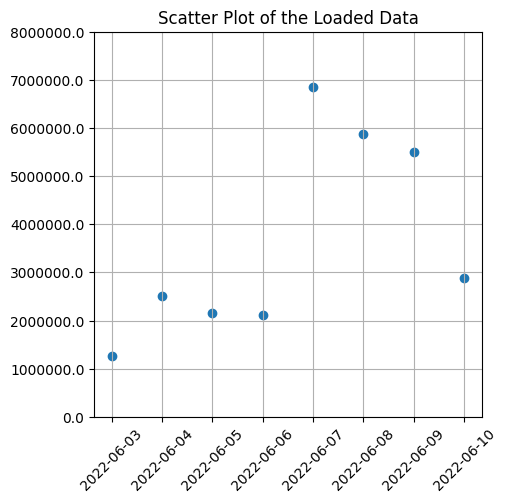

In [5]:
#setting up chart size
pyplt.figure(figsize=(5, 5))

#scatterplot of the loaded data
pyplt.scatter(x=SPINS_DF['timestamp'], y=SPINS_DF['Spins'])


# Retrieveing Current y lables [since yticks are mutlidimentional, i am only retrieving quantity values from y]
labels_content, remaining_args = pyplt.yticks()
# Making sure current y lables are not truncated
pyplt.yticks(labels_content, labels=labels_content)

#Displaying the chart
pyplt.title('Scatter Plot of the Loaded Data')
pyplt.grid(True)
pyplt.xticks(rotation=45)
pyplt.show()

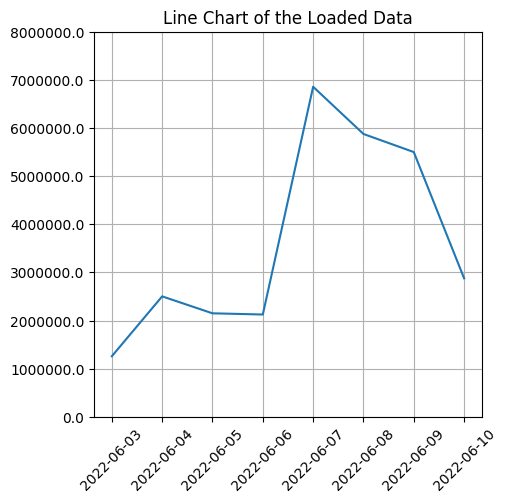

In [6]:
#setting up chart size
pyplt.figure(figsize=(5, 5))

#line-plot of the loaded data
pyplt.plot(SPINS_DF['timestamp'],SPINS_DF['Spins'])

# Retrieveing Current y lables [since yticks are mutlidimentional, i am only retrieving quantity values from y]
labels_content, remaining_args = pyplt.yticks()
# Making sure current y lables are not truncated
pyplt.yticks(labels_content, labels=labels_content)

#Displaying the chart
pyplt.title('Line Chart of the Loaded Data')
pyplt.grid(True)
pyplt.xticks(rotation=45)
pyplt.show()

## Predicting Trend

#### Exhibit A (Prediction Using Linear Regression)

In [7]:
#defining the x and y variables
X = np.array(SPINS_DF.index).reshape(-1, 1)
y = np.array(SPINS_DF['Spins'])

# Defining a Linear Reg model for predition
LR_model = LinearRegression()

# fitting the data into the model
LR_model.fit(X, y)

# using the constructed model to generate prediction for the next respective date in the timeline
predicted_values = LR_model.predict(np.array([[8]]))

#picking the first day from the series of predicted future values
upcoming_value = int(predicted_values[0])
print('Upcoming Spins for the day is ', upcoming_value)

if (upcoming_value > SPINS_DF['Spins'][7]):
  print("The Spins for next day goes UP")
else:
  print("The Spins for next day goes DOWN")

Upcoming Spins for the day is  5906676
The Spins for next day goes UP


#### Exhibit B (Prediction Using ARIMA)

In [14]:
SPINS_DF = pd.read_csv('/content/Scenario II.csv')
SPINS_DF['timestamp'] = pd.to_datetime(SPINS_DF['timestamp'], format='%m/%d/%Y %H:%M')

#formatting the new dataframe in correct timestamp since we will use timestamp as index
Arima_DF = SPINS_DF
Arima_DF.set_index('timestamp', inplace=True)

#defining the model and fitting the data
model = ARIMA(Arima_DF, order=(1,0,1))
model_fit = model.fit()

#making the forecast for subsequent date
forecast_value = model_fit.forecast(steps=1)

upcoming_value = int(forecast_value[0])
print('Upcoming Spins for the day is ', upcoming_value)

if (upcoming_value > SPINS_DF['Spins'][7]):
  print("The Spins for next day goes UP")
else:
  print("The Spins for next day goes DOWN")

Upcoming Spins for the day is  3210219
The Spins for next day goes UP
